# Gather

In [1]:
import pandas as pd
import json

In [2]:
twitter_archive_base = pd.read_csv('twitter-archive-enhanced.csv')
image_predict = pd.read_csv('image-predictions.tsv',sep='\t')

In [3]:
selected_list = []

with open('tweet-json.txt','r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_list.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                              'retweeted': json_data['retweeted'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
        
tweet_data = pd.DataFrame(selected_list, columns=['tweet_id','favorites','retweets','timestamp','retweeted'])

# Assess

 > Quality
         - twitter_archive_base: Update the missing dog names
         - twitter_archive_base: Remove the values which are not a dog name in the 'name' column
         - twitter_archive_base: identify if dog is Doggo, Pupper, etc with key words
         - twitter_archive_base: Keep tweets with only valid rating
         - twitter_archive_base: Remove re-tweets, keep only the original tweet with dog pics
         - image_predict: Keep only one final dog type ignoring the low quality dog type values
         - twitter_archive_base: Add the prediction dog type to the base archive data
         - twitter_archive_base: Add favorites, retweet to the base data from the tweet data
         - twitter_archive_base: Remove tweets that doesn't have a photo

 > Tidiness
         - twitter_archive_base: create a clean dog type in single column for the analysis
         - twitter_archive_base: clean the final master table by removing the columns that are not needed for the final analysis

In [4]:
twitter_archive_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
twitter_archive_base.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
435,820446719150292993,NaN,NaN,2017-01-15 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Peaches. She's the ulti...,8.001414e+17,4.196984e+09,2016-11-20 00:59:15 +0000,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
2320,666437273139982337,NaN,NaN,2015-11-17 02:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666437273...,7,10,None,None,None,None,None
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None
1241,712065007010385924,NaN,NaN,2016-03-21 23:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's clearly in charge of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712065007...,6,10,Chester,None,None,None,None
1424,697990423684476929,NaN,NaN,2016-02-12 03:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697990423...,11,10,Doug,None,None,None,None


In [6]:
twitter_archive_base[twitter_archive_base.name != 'None'] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
list(twitter_archive_base.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [9]:
twitter_archive_base[twitter_archive_base.tweet_id == 838085839343206401]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None


In [39]:
image_predict[image_predict.tweet_id == 888554962724278272]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
image_predict[image_predict.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [7]:
image_predict.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
491,675534494439489536,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,Eskimo_dog,0.615741,True,Siberian_husky,0.199544,True,malamute,0.179107,True
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,1,Chihuahua,0.319106,True,whippet,0.169134,True,toy_terrier,0.125815,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,0.049901,True
1997,875021211251597312,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True


In [13]:
list(image_predict.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [12]:
image_predict['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [14]:
tweet_data.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [15]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
retweeted    2354 non-null bool
dtypes: bool(1), int64(3), object(1)
memory usage: 75.9+ KB


In [16]:
list(tweet_data.columns)

['tweet_id', 'favorites', 'retweets', 'timestamp', 'retweeted']

In [17]:
tweet_data[tweet_data.retweets == 0]

,tweet_id,favorites,retweets,timestamp,retweeted
290,838085839343206401,150,0,Sat Mar 04 17:56:49 +0000 2017,False


In [18]:
tweet_data.retweets.sort_values(ascending=True)

290     0    
1293    2    
273     3    
341     3    
112     3    
29      4    
1078    6    
54      7    
426     10   
63      10   
2296    14   
2337    16   
185     17   
1521    19   
178     20   
2317    23   
211     23   
2187    25   
1235    26   
187     27   
408     31   
100     31   
610     32   
2258    34   
2222    34   
2257    37   
2335    37   
284     38   
883     38   
965     39   
        ..   
309     24013
528     24069
449     24069
1075    24319
888     24319
653     24514
1623    24514
117     25661
168     25661
114     27680
623     27728
1764    30742
458     31314
302     31314
1828    31989
134     32883
131     32883
868     33421
164     33421
536     37911
154     37911
445     42228
448     42228
65      45849
412     48265
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweets, Length: 2354, dtype: int64

# Clean

In [41]:
twitter_archive_base_clean = twitter_archive_base.copy()
image_predict_clean = image_predict.copy()
tweet_data_clean = tweet_data.copy()

### Quality issues

1. twitter_archive_base: Update the missing dog names

##### Define

Update the dog name where its found in the text, some places the Dog names are mentioned after the work 'named', identify the names and update the name column

In [20]:
# cleaning codes - dog names are appearing after the word 'named', so found that and updated the dog name
sub = 'named'
twitter_archive_base_clean["Indexes"]= twitter_archive_base_clean["text"].str.find(sub) 

In [21]:
twitter_archive_base_clean.loc[twitter_archive_base_clean['Indexes'] > 1, 'name'] = twitter_archive_base_clean['text'].str.split(' named ', 1).str[1].str.strip()
twitter_archive_base_clean.loc[twitter_archive_base_clean['Indexes'] > 1, 'name'] = twitter_archive_base_clean['name'].str.split(' ', 0).str[0].str.strip()
twitter_archive_base_clean['name'] = twitter_archive_base_clean['name'].apply(lambda x: x.replace('.', '')).apply(lambda x: x.replace(' ', ''))

In [22]:
# cleaning codes - dog names are appearing after the word 'name is', so found that and updated the dog name
sub = 'name is '
twitter_archive_base_clean["Indexes"]= twitter_archive_base_clean["text"].str.find(sub) 

In [23]:
twitter_archive_base_clean.loc[twitter_archive_base_clean['Indexes'] > 1, 'name'] = twitter_archive_base_clean['text'].str.split(' name is ', 1).str[1].str.strip()
twitter_archive_base_clean.loc[twitter_archive_base_clean['Indexes'] > 1, 'name'] = twitter_archive_base_clean['name'].str.split(' ', 0).str[0].str.strip()
twitter_archive_base_clean['name'] = twitter_archive_base_clean['name'].apply(lambda x: x.replace('.', '')).apply(lambda x: x.replace(' ', ''))

In [24]:
twitter_archive_base_clean[twitter_archive_base_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Indexes
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,-1
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,-1
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo,-1
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None,-1
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None,-1
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,-1
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None,-1
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None,-1
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None

2. twitter_archive_base: Remove the values which are not a dog name in the 'name' column

##### Define

Remove text in dog name column has values like a, an, the, etc, which clearly are not dog names, remove those from that places.

In [25]:
# remove a, an, the, such from dog name 
twitter_archive_base_clean.loc[((twitter_archive_base_clean.name == 'a') | 
                                (twitter_archive_base_clean.name == 'an') |
                                (twitter_archive_base_clean.name == 'the') |
                                (twitter_archive_base_clean.name == 'such') |
                                (twitter_archive_base_clean.name == 'quite')),'name'] = 'None'

In [26]:
# check if all are removed as expected
non_name_list = ["a","an","such","the","quite"]
twitter_archive_base_clean[twitter_archive_base_clean.name.isin(non_name_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Indexes


3. twitter_archive_base: identify if dog is Doggo, Pupper, etc with key words

##### Define

Based on the dog stage definition, identified few keys words that define the stage. If the keywords is used in the text, update the relevant stage 

Doggo - 
Big, older, old, mature

Pupper - 
Small, Younger

Puppo - 
teen, teenager

floof - 
fur

In [27]:
# see if any Doggo is there based on text - Checked all Big, older, old, mature  - No match
sub = ' older '
twitter_archive_base_clean["Doggo_i"]= twitter_archive_base_clean["text"].str.find(sub) 
twitter_archive_base_clean[twitter_archive_base_clean.Doggo_i > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Indexes,Doggo_i
922,756275833623502848,NaN,NaN,2016-07-21 23:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When ur older siblings get to play in the deep end but dad says ur not old enough. Maybe one day puppo. All 10/10 https://t.co/JrDAzMhwG9,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/756275833623502848/photo/1,https://twitter.com/dog_rates/status/756275833623502848/photo/1",10,10,None,None,None,None,puppo,-1,7


In [29]:
# see if any Pupper is there based on text - Checked all Small, Younger  - No match
sub = ' Younger '
twitter_archive_base_clean["Pupper_i"]= twitter_archive_base_clean["text"].str.find(sub) 
twitter_archive_base_clean[twitter_archive_base_clean.Pupper_i > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Indexes,Doggo_i,Pupper_i


In [30]:
# see if any Puppo is there based on text - Checked all teen, teenager  - one match for teen
sub = ' teen '
twitter_archive_base_clean["Puppo_i"]= twitter_archive_base_clean["text"].str.find(sub) 
twitter_archive_base_clean[twitter_archive_base_clean.Puppo_i > 1]
twitter_archive_base_clean.loc[twitter_archive_base_clean['Puppo_i'] > 1, 'puppo'] = 'puppo'
twitter_archive_base_clean[twitter_archive_base_clean.Puppo_i > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,Indexes,Doggo_i,Pupper_i,Puppo_i
2124,670374371102445568,NaN,NaN,2015-11-27 22:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's rebellious. Full of teen ang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670374371...,...,10,Daisy,None,None,None,puppo,-1,-1,-1,37


In [31]:
# see if any floofer is there based on text - Checked all fur  - one match for fur
sub = ' fur '
twitter_archive_base_clean["Floof_i"]= twitter_archive_base_clean["text"].str.find(sub) 
twitter_archive_base_clean[twitter_archive_base_clean.Floof_i > 1]
twitter_archive_base_clean.loc[twitter_archive_base_clean['Floof_i'] > 1, 'floofer'] = 'floofer'
twitter_archive_base_clean[twitter_archive_base_clean.Floof_i > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,Indexes,Doggo_i,Pupper_i,Puppo_i,Floof_i
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Lots of fur on him. Tw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183...,...,None,None,floofer,None,None,-1,-1,-1,-1,31


4. twitter_archive_base: Keep tweets with only valid rating

##### Define

Remove tweets that doesn't have 10 as denominator, as they are not valid ratings

In [28]:
# remove the ones that doesn't have the proper rating denominator, most re-tweets will be removed
twitter_archive_base_clean = twitter_archive_base_clean[twitter_archive_base_clean['text'].str.contains('[0-9]{1}/10.*')]

5. twitter_archive_base: Remove re-tweets, keep only the original tweet with dog pics

In [29]:
twitter_archive_base_clean = twitter_archive_base_clean[twitter_archive_base_clean.retweeted_status_id.isnull()]

6. image_predict: Keep only one final dog type ignoring the low quality dog type values

##### Define

Keep only one final dog type with the most confidence 
1) p1_dog is True and p1_conf is greater than p2_conf and p3_conf then dog_breed is p1
2) p1_dog is True and p2_dog is True and p2_conf is greater than p1_conf then dog_breed is p2
3) p1_dog is True and p2_dog is True and p3_dog is True and p3_conf is greater than p1_conf and p2_conf then dog_breed is p3
4) p1_dog is False and p2_dog is True and p2_conf is greater than p3_conf then dog_breed is p2
5) p1_dog is False and p2_dog is False and P3_dog is True then dog_breed is p3
6) p1_dog is False and P2_dog is False and P3_dog is False then remove

In [30]:
import numpy as np
def flag_df(image_predict_clean):

    if ((image_predict_clean['p1_dog'] == True) and (image_predict_clean['p1_conf']) > ((image_predict_clean['p2_conf']) or (image_predict_clean['p3_conf']))):
        return image_predict_clean['p1']
    elif ((image_predict_clean['p1_dog'] == True) and (image_predict_clean['p2_dog'] == True) and (image_predict_clean['p2_conf']) > (image_predict_clean['p1_conf'])):
        return image_predict_clean['p2']
    elif ((image_predict_clean['p1_dog'] == True) and (image_predict_clean['p2_dog'] == True) and (image_predict_clean['p3_dog'] == True) and (image_predict_clean['p3_conf']) > ((image_predict_clean['p1_conf']) or (image_predict_clean['p2_conf']))):
        return image_predict_clean['p3']
    elif ((image_predict_clean['p1_dog'] == False) and (image_predict_clean['p2_dog'] == True) and (image_predict_clean['p2_conf']) > (image_predict_clean['p3_conf'])):
        return image_predict_clean['p2']
    elif ((image_predict_clean['p1_dog'] == False) and (image_predict_clean['p2_dog'] == False) and (image_predict_clean['p3_dog'] == True)):
        return image_predict_clean['p3']
    elif ((image_predict_clean['p1_dog'] == False) and (image_predict_clean['p2_dog'] == False) and (image_predict_clean['p3_dog'] == False)):
        return np.nan
image_predict_clean['dog_breed'] = image_predict_clean.apply(flag_df, axis = 1)

In [31]:
image_predict_clean = image_predict_clean[~image_predict_clean.dog_breed.isnull()]
image_predict_clean = image_predict_clean[['tweet_id','dog_breed']]
image_predict_clean

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
5,666050758794694657,Bernese_mountain_dog
7,666055525042405380,chow
8,666057090499244032,golden_retriever
9,666058600524156928,miniature_poodle
10,666063827256086533,golden_retriever


7. twitter_archive_base: Add the prediction dog type to the base archive data

##### Define

Once we get the final prediction of the dog type, update the information to the base archive data

In [32]:
twitter_archive_base_clean = pd.merge(twitter_archive_base_clean,image_predict_clean,left_on = "tweet_id",right_on = "tweet_id",how="left")

8. twitter_archive_base: Add favorites, retweet to the base data from the tweet data

##### Define

Add the retweet and favourites to the base_archive data, so it will be master data

In [33]:
twitter_archive_base_clean = pd.merge(twitter_archive_base_clean,tweet_data,left_on = "tweet_id",right_on = "tweet_id",how="left")

9. twitter_archive_base: Remove tweets that doesn't have a photo

##### Define

Remove tweets that doesnt have a photo

In [34]:
twitter_archive_base_clean = twitter_archive_base_clean[~twitter_archive_base_clean.expanded_urls.isnull()]

# Tidiness

1. twitter_archive_base: create a clean dog type in single column for the analysis

##### Define

create the dog type in a single column, from the four columns doggo, floofer, pupper and puppo

In [35]:
#create a single column of the dog types

dog_type_df = twitter_archive_base_clean.copy()

In [40]:
dog_type_df = pd.melt(dog_type_df,id_vars=['tweet_id'],value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_type')
dog_type_df = dog_type_df.drop('variable',axis=1)
dog_type_df = dog_type_df[dog_type_df.dog_type != 'None']
dog_type_df

,tweet_id,dog_type
9,890240255349198849,doggo
39,884162670584377345,doggo
86,872967104147763200,doggo
94,871515927908634625,doggo
95,871102520638267392,doggo
104,869596645499047938,doggo
144,858843525470990336,doggo
156,855851453814013952,doggo
163,854010172552949760,doggo
194,846514051647705089,doggo


In [36]:
twitter_archive_base_clean = pd.merge(twitter_archive_base_clean,dog_type_df,left_on = "tweet_id",right_on = "tweet_id",how="left")

##Define - Multipe dog stage

###For dog stage, there are some rows with multiple dog stages

In [42]:
# handle none
twitter_archive_base_clean.doggo.replace('None', '', inplace=True)
twitter_archive_base_clean.floofer.replace('None', '', inplace=True)
twitter_archive_base_clean.pupper.replace('None', '', inplace=True)
twitter_archive_base_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_base_clean['dog_stage'] = twitter_archive_base_clean.doggo + twitter_archive_base_clean.floofer + twitter_archive_base_clean.pupper + twitter_archive_base_clean.puppo

# handle multiple stages
twitter_archive_base_clean.loc[twitter_archive_base_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_base_clean.loc[twitter_archive_base_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_base_clean.loc[twitter_archive_base_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_base_clean.loc[twitter_archive_base_clean.dog_stage == '', 'dog_stage'] = np.nan

## Define Decimal dog rating

###For dog ratings, there are some observations with decimal ratings

In [45]:
twitter_archive_base_clean[twitter_archive_base_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


2. twitter_archive_base: clean the final master table by removing the columns that are not needed for the final analysis

##### Define

Clean the final master table - twitter_archive_base_clean by removing the columns that are not needed for the final analysis

In [ ]:
list(twitter_archive_base_clean.columns)
twitter_archive_master = twitter_archive_base_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','Doggo_i'
                                                       ,'Pupper_i','Puppo_i','Floof_i','doggo','floofer','pupper',
                                                       'puppo','Indexes','retweeted','timestamp_x','timestamp_y',
                                                       'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
                                                       ],axis=1)

In [ ]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Insights

### 1) Top five favorite dogs

In [45]:
twitter_final_master = twitter_archive_master.copy()

In [46]:
list(twitter_final_master.columns)

['tweet_id',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_breed',
 'favorites',
 'retweets',
 'dog_type']

In [47]:
twitter_final_master.nlargest(5,'favorites')

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,favorites,retweets,dog_type
329,822872901745569793,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,Lakeland_terrier,132810,48265,puppo
836,744234799360020481,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,Labrador_retriever,131075,79515,doggo
60,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,English_springer,107956,45849,NaN
423,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,Chihuahua,107015,56625,NaN
115,866450705531457537,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,French_bulldog,106827,32883,pupper


### 2) Least five favorite dogs

In [48]:
twitter_final_master.nsmallest(5,'favorites')

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,favorites,retweets,dog_type
2099,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,English_setter,81,16,NaN
2079,666447344410484738,This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,curly-coated_retriever,107,23,NaN
2097,666268910803644416,Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,10,None,NaN,108,37,NaN
2111,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,miniature_pinscher,111,41,NaN
2087,666407126856765440,This is a southern Vesuvius bumblegruff. Can d...,https://twitter.com/dog_rates/status/666407126...,7,10,None,black-and-tan_coonhound,113,44,NaN


### 3) No. of dogs rated higher

In [49]:
twitter_final_master['rating'] = twitter_final_master['rating_numerator'] /twitter_final_master['rating_denominator']

In [50]:
twitter_final_master = twitter_final_master[twitter_final_master['rating_numerator'] < 24]

In [51]:
twitter_final_master.nlargest(20,'rating')

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,favorites,retweets,dog_type,rating
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,Pembroke,32467,7711,doggo,1.4
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,None,NaN,46959,12082,NaN,1.4
32,885518971528720385,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,NaN,20788,3899,NaN,1.4
37,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,None,Pembroke,27478,5856,NaN,1.4
51,881536004380872706,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,None,Samoyed,50199,16570,pupper,1.4
67,878057613040115712,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,French_bulldog,42876,7181,NaN,1.4
73,876537666061221889,I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,14,10,None,NaN,23869,4800,NaN,1.4
95,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,NaN,21461,5764,doggo,1.4
101,870063196459192321,Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,NaN,37771,8840,NaN,1.4
106,868880397819494401,This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,French_bulldog,55098,12518,NaN,1.4


In [52]:
twitter_final_master[(twitter_final_master['rating_numerator'] == 14 ) & (twitter_final_master['rating_denominator'] == 10 )].tweet_id.count()

40

In [53]:
twitter_final_master[~(twitter_final_master['rating_numerator'] == 14 )].tweet_id.count()

2070

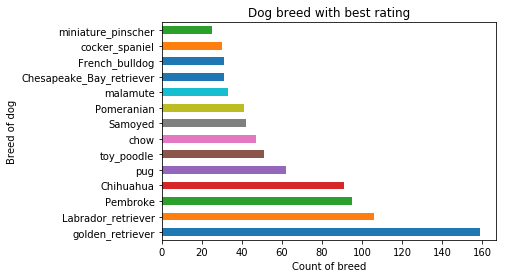

In [55]:
import matplotlib.pyplot as plt
# visualize dog breeeds
dog_breed = twitter_final_master.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Dog breed with best rating')
plt.xlabel('Count of breed')
plt.ylabel('Breed of dog');

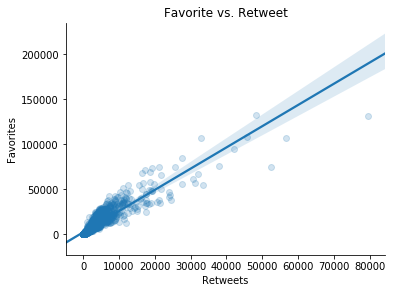

In [59]:
# Scatter plot of retweets vs favorite count
import seaborn as sns
sns.lmplot(x="retweets", 
           y="favorites", 
           data=twitter_final_master,
           size = 4,
           aspect=1.4,
           scatter_kws={'alpha':1/5});

plt.title('Favorite vs. Retweet');
plt.xlabel('Retweets');
plt.ylabel('Favorites');